In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-08 14:53:25--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1,41M  3,18MB/s    in 0,4s    

2023-10-08 14:53:26 (3,18 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [11]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Preparation
    Keep only the columns above
    Lowercase the column names and replace spaces with underscores
    Fill the missing values with 0
    Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

    Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [12]:
selected_cols = ['Make', 'Model', 'Year', 'Engine HP' ,'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
df = df[selected_cols]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.fillna(0, inplace=True)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [28]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [13]:
data_class = df.copy()
mean = data_class['msrp'].mean()

data_class['above_average'] = np.where(data_class['msrp']>=mean,1,0)
data_class = data_class.drop(['msrp'], axis=1)

In [14]:
data_class

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [16]:
df_full_train, df_val = train_test_split(data_class, test_size=0.2, random_state=1)
df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,1
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,0
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,0
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,1
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,0
...,...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24,0
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17,0
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32,0
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16,0


In [18]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

    For each numerical variable, use it as score and compute AUC with the above_average variable
    Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

    engine_hp
    engine_cylinders
    highway_mpg
    city_mpg


Train dummy model

In [32]:
data_class[numerical].head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2011,335.0,6.0,26,19
1,2011,300.0,6.0,28,19
2,2011,300.0,6.0,28,20
3,2011,230.0,6.0,28,18
4,2011,230.0,6.0,28,18


In [39]:
engine_hp = df_train['engine_hp'].to_numpy()
engine_cylinders = df_train['engine_cylinders'].to_numpy()
highway_mpg = df_train['highway_mpg'].to_numpy()
city_mpg = df_train['city_mpg'].to_numpy()

above_average = df_train['above_average'].to_numpy()

In [53]:
# Sort the arrays based on engine_hp
sorted_indices = np.argsort(engine_hp)
engine_hp_sorted = engine_hp[sorted_indices]
above_average_sorted = above_average[sorted_indices]

print("engine_hp Feature Importance Score: ", round(roc_auc_score(above_average_sorted, engine_hp_sorted), 5))

engine_hp Feature Importance Score:  0.9171


In [56]:
# Sort the arrays based on engine_hp
sorted_indices = np.argsort(engine_cylinders)
engine_cylinders_sorted = engine_cylinders[sorted_indices]
above_average_sorted = above_average[sorted_indices]

print("engine_cylinders Feature Importance Score: ", round(roc_auc_score(above_average_sorted, engine_cylinders_sorted), 5))

engine_cylinders Feature Importance Score:  0.76612


In [57]:
# Sort the arrays based on engine_hp
sorted_indices = np.argsort(highway_mpg)
highway_mpg_sorted = highway_mpg[sorted_indices]
above_average_sorted = above_average[sorted_indices]

print("highway_mpg Feature Importance Score: ", round(roc_auc_score(above_average_sorted, highway_mpg_sorted), 5))

highway_mpg Feature Importance Score:  0.36694


In [58]:
# Sort the arrays based on engine_hp
sorted_indices = np.argsort(city_mpg)
city_mpg_sorted = city_mpg[sorted_indices]
above_average_sorted = above_average[sorted_indices]

print("city_mpg Feature Importance Score: ", round(roc_auc_score(above_average_sorted, engine_cylinders_sorted), 5))

city_mpg Feature Importance Score:  0.35116


Question 1 answer is ***engine_hp***

# Question 2: Training the model
    Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
    LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

    0.678
    0.779
    0.878
    0.979


In [61]:
solver = 'liblinear'
C = 1.0
max_iter = 1000

In [62]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver=solver, C=C, max_iter=max_iter)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [63]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [65]:
y_pred = model.predict(X_val)

In [72]:
round(roc_auc_score(y_val, y_pred), 4)

0.9798

AUC Score is 0.979

# Question 3: Precision and Recall

Now let's compute precision and recall for our model.

    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
    For each threshold, compute precision and recall
    Plot them

At which threshold precision and recall curves intersect?

    0.28
    0.48
    0.68
    0.88


## Precision and Recall

In [93]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)

    scores.append((t, p, r))

/tmp/ipykernel_14034/271031550.py:18: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp)


In [88]:
columns = ['threshold', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)

In [89]:
df_scores

,threshold,precision,recall
0,0.00,0.277801,1.000000
1,0.01,0.461216,0.996979
2,0.02,0.516028,0.996979
3,0.03,0.544178,0.995468
4,0.04,0.583186,0.995468
...,...,...,...
96,0.96,0.989209,0.415408
97,0.97,0.988506,0.389728
98,0.98,1.000000,0.350453
99,0.99,1.000000,0.276435


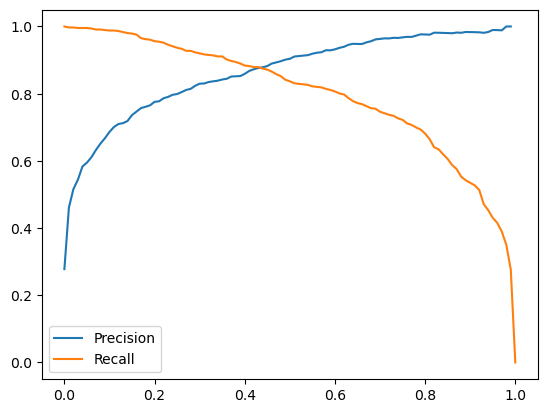

In [90]:
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.legend()

Question 3 answer is **0.88**

# Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1: 

Where is precision and

is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

    0.12
    0.32
    0.52
    0.72


In [94]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = 2 * (p*r) / (p+r)
    scores.append((t, p, r, f1))

/tmp/ipykernel_14034/3622149785.py:18: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp)


In [95]:
columns = ['threshold', 'precision', 'recall', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)

In [96]:
df_scores

,threshold,precision,recall,f1
0,0.00,0.277801,1.000000,0.434811
1,0.01,0.461216,0.996979,0.630674
2,0.02,0.516028,0.996979,0.680062
3,0.03,0.544178,0.995468,0.703684
4,0.04,0.583186,0.995468,0.735491
...,...,...,...,...
96,0.96,0.989209,0.415408,0.585106
97,0.97,0.988506,0.389728,0.559047
98,0.98,1.000000,0.350453,0.519016
99,0.99,1.000000,0.276435,0.433136


In [97]:
df_scores['f1'].max()

0.8778280542986426

# Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

    Iterate over different folds of df_full_train
    Split the data into train and validation
    Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

    0.003
    0.030
    0.090
    0.140


In [100]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [101]:
dv, model = train(df_train, y_train, C=1)

In [108]:
def predict(df_train, dv, model):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [109]:
y_pred = predict(df_val, dv, model)

In [106]:
from sklearn.model_selection import KFold

In [107]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [110]:
from tqdm.auto import tqdm

In [116]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

In [117]:
scores

[0.9784891235596622,
 0.9802029731275015,
 0.9829025151971447,
 0.9772586581897273,
 0.9776862026862028]

In [121]:
print('%.3f +- %.3f' % (np.mean(scores) , np.std(scores)))

0.979 +- 0.002


# Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

    Iterate over the following C values: [0.01, 0.1, 0.5, 10]
    Initialize KFold with the same parameters as previously
    Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

    0.01
    0.1
    0.5
    10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [123]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.952 +- 0.003
C=0.1 0.972 +- 0.002
C=0.5 0.977 +- 0.002
C=10 0.981 +- 0.003
